In [ ]:
Problem Statement

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection

In [2]:
#import dataset
df = pd.read_csv('Customer_data.csv')

In [3]:
df.head()

,Customer Age,TransactionAmount
0,17.9,4963.129824
1,5.8,8253.318230
2,14.2,14125.271049
3,12.8,14867.810811
4,20.8,6927.500432


In [4]:
df.columns

Index(['Customer Age', 'TransactionAmount'], dtype='object')

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer Age       10000 non-null  float64
 1   TransactionAmount  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [6]:
#check the size of the dataset
df.shape

(10000, 2)

In [7]:
df.describe()

,Customer Age,TransactionAmount
count,10000.000000,10000.000000
mean,14.846520,9799.054144
std,4.303432,3606.092572
min,4.100000,2034.809099
25%,13.200000,6399.985037
50%,15.700000,9679.240424
75%,18.300000,13202.263585
max,23.200000,17361.169791


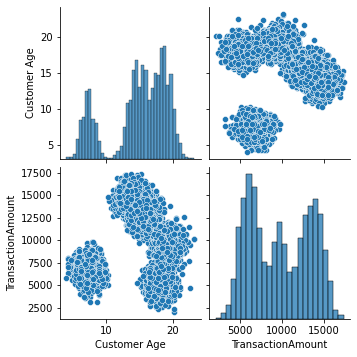

In [8]:
sns.pairplot(df, kind='scatter')

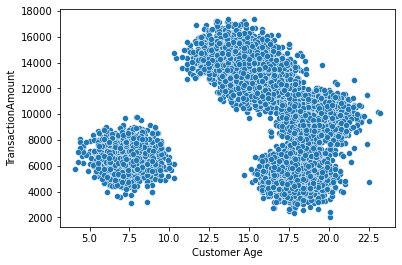

In [10]:
sns.scatterplot(x=df['Customer Age'], y=df['TransactionAmount']);

In [13]:
# a quick way of type conversion from float to int
# df['Customer Age'].astype(int)


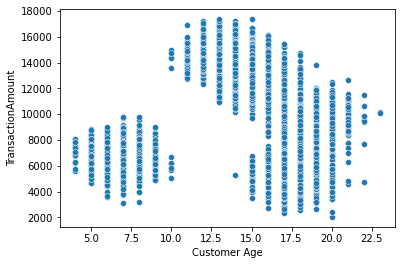

In [12]:
#visualising with conversion to int
sns.scatterplot(x=df['Customer Age'].astype(int), y=df['TransactionAmount']);

In [14]:
#checking for missing values
df.isnull().sum()

Customer Age         0
TransactionAmount    0
dtype: int64

### Data Preprocessing

In [ ]:
#we have to scale, to scale is to bring data to a defined range
#MinMaxscaling
#StandardScaling



In [15]:
from sklearn.preprocessing import StandardScaler

In [97]:
# Feature scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [98]:
scaled_df = pd.DataFrame(data=scaled_df, columns=['CustomerAge', 'TransactionAmount'])

In [99]:
scaled_df.head()

,CustomerAge,TransactionAmount
0,0.709581,-1.341110
1,-2.102269,-0.428667
2,-0.150241,1.199757
3,-0.475579,1.405679
4,1.383495,-0.796346


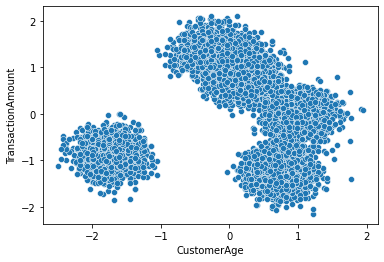

In [28]:
#QUICK COMPARISON WITH THE DATA BEFORE SCALING
sns.scatterplot(x = scaled_df.CustomerAge, y=scaled_df.TransactionAmount);

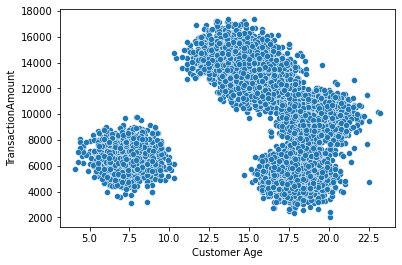

In [26]:
sns.scatterplot(x=df['Customer Age'], y=df['TransactionAmount']);

### Model Selection

In [ ]:
from sklearn.

In [29]:
# We will be using Kmeans algorithm

from sklearn.cluster import KMeans

### Train and Evaluation

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
#remember this is a supervised ml task and there is no target, y
scaled_df.head()

,CustomerAge,TransactionAmount
0,0.709581,-1.341110
1,-2.102269,-0.428667
2,-0.150241,1.199757
3,-0.475579,1.405679
4,1.383495,-0.796346


In [33]:
X_train, X_test = train_test_split(scaled_df, test_size=.2, random_state=42)

In [34]:
X_train

,CustomerAge,TransactionAmount
9254,-1.776931,-0.966740
1561,1.290541,-0.445477
1670,0.198335,0.902495
6087,0.221574,0.829391
6669,1.267303,0.186776
...,...,...
5734,0.012428,1.357647
5191,0.709581,0.060720
5390,0.802534,0.165811
860,1.337018,0.042671


### Kmeans Model

In [69]:

kmeans = KMeans(n_clusters=4, random_state=42)
#without specifiying clusters, the default is 8 clusters

#training the model
kmeans.fit(X_train)

KMeans(n_clusters=4, random_state=42)

In [70]:
#the max number of clusters
kmeans.predict(X_test).max()

3

In [71]:
#prediction
labels = kmeans.predict(X_test)

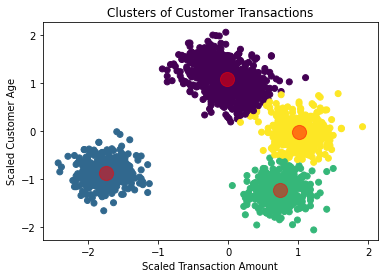

In [79]:
# Visualizing the clusters
plt.scatter(X_test.CustomerAge, X_test.TransactionAmount, c=labels, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.xlabel('Scaled Transaction Amount')
plt.ylabel('Scaled Customer Age')
plt.title('Clusters of Customer Transactions')
plt.show()

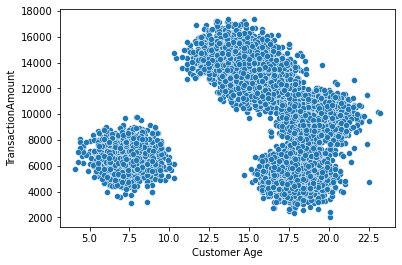

In [45]:
#before prediction
sns.scatterplot(x=df['Customer Age'], y=df['TransactionAmount']);

In [46]:
labels

array([2, 2, 3, ..., 3, 3, 3])

In [47]:
#import the metrics for evaluation
from sklearn.metrics import silhouette_score

In [68]:
#evaluation score...the closer it is to 1 the better
silhouette_score(X_test, labels)

#for cluster of 8 the ss is .36 which is low
# for 5 ss is .59
# for 4 ss is .67
# 3 or 4 clusters has the same performance

0.6651240348291886

In [60]:
### Using elbow method for fine tuning

# K-means Clustering
# Using the Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_test)
    inertia.append(kmeans.inertia_)

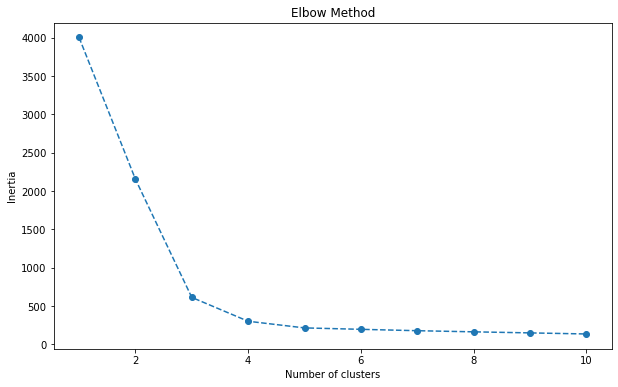

In [61]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [81]:
#adding the predicted label to the data
X_test['labels'] = labels

In [82]:
X_test

,CustomerAge,TransactionAmount,labels
6252,-1.428355,-0.946612,1
4684,-1.869885,-0.884847,1
1731,0.802534,0.100936,3
4742,0.732819,-0.499991,3
4521,0.337766,0.846699,0
...,...,...,...
6412,0.384243,-1.552561,2
8285,1.127872,-0.334700,3
7853,0.941965,-0.451623,3
1095,0.686342,0.322714,3


In [87]:
#filtered all the label with clustter 3
X_test[X_test['labels'] == 3]

,CustomerAge,TransactionAmount,labels
1731,0.802534,0.100936,3
4742,0.732819,-0.499991,3
6033,1.220826,-0.232868,3
1963,1.081396,0.294585,3
8328,1.127872,-0.189853,3
...,...,...,...
964,1.058157,0.102337,3
8285,1.127872,-0.334700,3
7853,0.941965,-0.451623,3
1095,0.686342,0.322714,3


In [88]:
X_test.labels.value_counts()

0    781
3    425
2    410
1    384
Name: labels, dtype: int64

In [89]:
centers

array([[-0.01871911,  1.07728003],
       [-1.7434252 , -0.87124124],
       [ 0.73670197, -1.22509792],
       [ 1.01316908, -0.0137155 ]])

#### SCENERIOS

In [101]:
case1 = pd.DataFrame({'Customer Age':[17], 'TransactionAmount' : [10000]})

In [102]:
case1

,Customer Age,TransactionAmount
0,17,10000


In [105]:
scaled_case = scaler.transform(case1)
scaled_case

array([[0.50043492, 0.05572677]])

In [106]:
kmeans.predict(scaled_case)

C:\Users\TiOluwani\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [107]:
#this user belongs to cluster 3 and should be given priveldge or recommendations of clustter 3

### ASSIGNMENT

Implement the supervised model on your own and improve the model performance to less than 20k error using any method of improvement of yours.

PS: Avoid overfitting